In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
import tensorflow as tf
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras import Model



# setting random seed to ensure that results are repeatable
np.random.seed(1)

In [3]:
df = pd.read_csv('heartfailure_train_df.csv')
df.head(5)

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,-1.001659,1.084935,-0.475559,-0.827940,-0.687067,1.322876,1.751802,-0.400321,0.333046,-1.350676,-0.664364,-1.514594,-0.709646
1,0.734629,-0.921714,-0.353834,1.207818,-1.765496,1.322876,1.352637,-0.400321,-0.118945,0.740370,1.505199,0.754398,-0.709646
2,1.148031,-0.921714,-0.439595,-0.827940,0.972055,1.322876,-0.128478,-0.312712,2.593001,0.740370,-0.664364,1.025130,-0.709646
3,-0.092175,1.084935,-0.007104,1.207818,1.801616,-0.755929,-0.695713,-0.312712,1.237028,-1.350676,-0.664364,-1.243862,1.409154
4,-0.918978,1.084935,1.602981,1.207818,-0.272287,-0.755929,-1.945732,-0.487931,1.237028,-1.350676,-0.664364,-0.044906,1.409154


In [4]:
train_X = pd.read_csv('heartfailure_train_X.csv')
train_y =pd.read_csv('heartfailure_train_y.csv') 
test_X = pd.read_csv('heartfailure_test_X.csv')
test_y = pd.read_csv('heartfailure_test_y.csv')

In [5]:
test_y

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0
...,...
294,1
295,1
296,1
297,1


## Modeling

In [6]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

# logistic regression default


In [7]:
model = LogisticRegression()

In [8]:
lgr = model.fit(train_X, train_y)

C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
recall=recall_score(test_y, y_pred)
print("recall:", recall)
print("Accuracy:", accuracy)

recall: 0.9211822660098522
Accuracy: 0.8528428093645485


# logistic regression using random and grid

In [10]:
lgr = LogisticRegression()

# Define the hyperparameters that you want to search over using a grid search
grid_param = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}

# Define the hyperparameters that you want to search over using a random search
random_param = {'penalty': ['l1', 'l2'], 
                'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear', 'saga']}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(lgr, grid_param, cv=5)
grid_search.fit(train_X, train_y)
best_grid = grid_search.best_estimator_

# Perform a random search to find the best hyperparameters
random_search = RandomizedSearchCV(lgr, random_param, cv=5)
random_search.fit(train_X, train_y)
best_random = random_search.best_estimator_

# Evaluate the models on the test set
y_pred_grid = best_grid.predict(test_X)
y_pred_random = best_random.predict(test_X)

acc_grid = accuracy_score(test_y, y_pred_grid)
acc_random = accuracy_score(test_y, y_pred_random)

print("Accuracy using grid search:", acc_grid)
print("Accuracy using random search:", acc_random)

C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Accuracy using grid search: 0.8394648829431438
Accuracy using random search: 0.842809364548495


# decision tree default

In [11]:
dtclf = DecisionTreeClassifier(random_state=42)

# train the classifier on the training data
dtclf.fit(train_X, train_y)

# make predictions on the testing data
y_pred = dtclf.predict(test_X)

# calculate accuracy of the classifier
accuracy = accuracy_score(test_y, y_pred)


print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 100.00%


# decision tree using random search and grid search

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define random search parameters
random_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
}

# Create decision tree classifier
dtc = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)
print('Best parameters for grid search:', grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Perform random search
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=random_param, n_iter=50, cv=5)
random_search.fit(train_X, train_y)
print('Best parameters for random search:', random_search.best_params_)
y_pred = random_search.predict(test_X)

accuracy = accuracy_score(test_y, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Best parameters for grid search: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 100.00%
Best parameters for random search: {'min_samples_split': 2, 'min_samples_leaf': 9, 'max_depth': 2, 'criterion': 'gini'}
Accuracy: 84.62%


# svm using random search and grid search


In [13]:
# Define the parameter grid for Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}

# Define the parameter distributions for Random Search
param_dist = {'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf', 'poly']}

# Initialize SVM classifier
svm_classifier = svm.SVC()

# Perform Grid Search
grid_search = GridSearchCV(svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)

# Perform Random Search
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(train_X, train_y)

# Print the best hyperparameters found by Grid Search
print("Best hyperparameters using Grid Search: ", grid_search.best_params_)

# Print the best hyperparameters found by Random Search
print("Best hyperparameters using Random Search: ", random_search.best_params_)

# Evaluate the model using the best hyperparameters found by Grid Search
svm_classifier.set_params(**grid_search.best_params_)
svm_classifier.fit(train_X, train_y)
print("Accuracy using best hyperparameters found by Grid Search: ", svm_classifier.score(test_X, test_y))

# Evaluate the model using the best hyperparameters found by Random Search
svm_classifier.set_params(**random_search.best_params_)
svm_classifier.fit(train_X, train_y)
print("Accuracy using best hyperparameters found by Random Search: ", svm_classifier.score(test_X, test_y))

C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Best hyperparameters using Grid Search:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best hyperparameters using Random Search:  {'kernel': 'linear', 'gamma': 0.1, 'C': 1.0}
Accuracy using best hyperparameters found by Grid Search:  0.8461538461538461
Accuracy using best hyperparameters found by Random Search:  0.8461538461538461


C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

# Summary

After training and splitting the data in the previous notebook we have directly imported and loaded the data sets of train and test, now that we have loaded the data we can directly perfomr the metric analysis. For this I have taken accuracy as my metrics because as per my data set is considered it is well balanced and trained and after the changes made to 0 and 1 which says that in the target varibale, if it says the value is 0 then the death is not occured and if it says 1 death is occured.

1)To predict the death occured precisely considering the other attributes I have choosen accuracy as my scoring metric. As a classification problem I have first made inclinatio to do the logistic regression using random search and grid search for which I have closely got to 84% in both the cases, based on the problem that we are solving I am satisfied that the data is balanced and have acheived good accuracy for logistic regression.


2)Decision tree: For decision tree default we have achieved an accuracy score of 100 percent which is good thing to consider, we understand the training data has leant to overfit the data and also it has leanrt the noise and peculiarities of the training data set. But one thought that strikes here is that the training data set has learnt good enough that is giving us better output but we should also use cross validation techniques than can genralise well on the new data obtained from the training data.

3)IN SVM using random search and grid search the model is able to give the accuracy if 84 percent in both the cases that means the depth of the data that this model is covering to get 84 percent is a good, as explained above the training data set have learned to overcome the noise and and in this case it can be considered as a good model for the quality of the data that we have after training the data.

Overall, the accuracy acheived is nearly 84 percent in all the cases and we can conclude that the data is trained well and the quality of the data is good, but what I still feel is that we can tune the hyper parameters and can acheive good results above 84 percent, there is also decent amount of chance that the model may not be able to generalize to new data that is significantly different from the training data. To evaluate all this we should tune the hyperparametrs and also check thorougly with the overfitting of the data.

## Neural Network

#### Without Randomsearch and gridsearch cv

In [14]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(train_X,np.ravel( train_y))

CPU times: total: 656 ms
Wall time: 538 ms


C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
%%time
y_pred = ann.predict(test_X)

CPU times: total: 0 ns
Wall time: 8.14 ms


In [16]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       203

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



## With RandomizedSearchCV

In [17]:
%%time

score_measure = "f1"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20),(60,60,60), (60,70, 80), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [3000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(train_X, train_y)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 3000, 'learning_rate_init': 0.2, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50,), 'alpha': 1, 'activation': 'tanh'}
CPU times: total: 1.77 s
Wall time: 1min 11s


C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
%%time
y_pred = bestRecallTree.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        96
           1       0.93      0.94      0.93       203

    accuracy                           0.91       299
   macro avg       0.90      0.89      0.90       299
weighted avg       0.91      0.91      0.91       299

CPU times: total: 31.2 ms
Wall time: 21.5 ms


## With GridSearchCV

In [19]:
%%time

score_measure = "f1"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,30), (50,70), (50,90)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd'],
    'alpha': [0,.5 ],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.1,0.2,0.25],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(train_X, train_y)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\ajayk\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu', 'alpha': 0, 'hidden_layer_sizes': (50, 30), 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 5000, 'solver': 'sgd'}
CPU times: total: 2.84 s
Wall time: 52 s


In [20]:
%%time
y_pred = bestRecallTree.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        96
           1       0.85      0.93      0.89       203

    accuracy                           0.84       299
   macro avg       0.83      0.80      0.81       299
weighted avg       0.84      0.84      0.84       299

CPU times: total: 15.6 ms
Wall time: 19.3 ms


In [21]:
c_matrix = confusion_matrix(test_y, y_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")


Accuracy=0.8428094 Precision=0.8545455 Recall=0.9261084 F1=0.8888889


## Keras with SKlearn

In [24]:
%%time


def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    #the out is either 0 or 1 which is single numeric value, like a regression task so the tensor shape is (None,1)
    

    return model



CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()

CPU times: total: 46.9 ms
Wall time: 34.3 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [26]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [27]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='accuracy',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=100, 
    cv=3)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(train_X, train_y,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.6521
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6294
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6211
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5941
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5840
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5648
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5519
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5347
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5207
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.6986
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6755
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - lo

In [28]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.001,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100,),
 'model__dropout': 0.1,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 20}

In [29]:
best_model = rnd_search_cv.best_estimator_

In [30]:
%%time

print(f"best score {best_model.score(test_X, test_y)}")
print(f"min loss {min(best_model.history_['loss'])}")

15/15 [==============================] - 0s 2ms/step
best score 0.8494983277591973
min loss 0.3873712718486786
CPU times: total: 828 ms
Wall time: 285 ms


In [31]:
best_model.history_

defaultdict(list,
            {'loss': [0.6675435900688171,
              0.5906670093536377,
              0.5368946194648743,
              0.48925653100013733,
              0.46304234862327576,
              0.44233208894729614,
              0.4220452904701233,
              0.4046628177165985,
              0.3998369574546814,
              0.3873712718486786]})

15/15 [==============================] - 0s 1ms/step


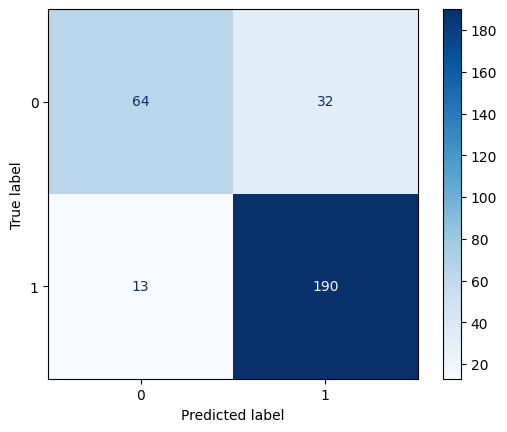

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, best_model.predict(test_X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(test_y, best_model.predict(test_X), digits=4))

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.8312    0.6667    0.7399        96
           1     0.8559    0.9360    0.8941       203

    accuracy                         0.8495       299
   macro avg     0.8435    0.8013    0.8170       299
weighted avg     0.8479    0.8495    0.8446       299



In [35]:
y_pred=best_model.predict(test_X)

15/15 [==============================] - 0s 949us/step


In [36]:
%%time
y_pred = best_model.predict(test_X)
print(classification_report(test_y, y_pred))

15/15 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        96
           1       0.86      0.94      0.89       203

    accuracy                           0.85       299
   macro avg       0.84      0.80      0.82       299
weighted avg       0.85      0.85      0.84       299

CPU times: total: 250 ms
Wall time: 116 ms


In [37]:
c_matrix = confusion_matrix(test_y, y_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")



Accuracy=0.8494983 Precision=0.8558559 Recall=0.9359606 F1=0.8941176


# Summary:



For the assignment 1 in most of the cases the accuracy was 84.6 and for the neural network and keras with sklearn have given out the accuracy of 84.9 percent though the increase in the accuracy was only .3 percent but we should consider the improvement in accuracy and the it has improved a bit from the last time it means that the amount of error that we can encounter in our prediction have been lessened. As my dataset is only having 300 entries the accuracy have not been improved much but when we take the large data sets the mapping iterations that take to bring out best output will increase and there can be a huge difference in the change of the accuracy scores. Also by looking at the confusion matrix we were able to select 190 true cases where the death happened and 64 cases where the death didnt happened that brings us to 254 which is 84.6 percent of the data is predeicted accurately. Though there are 13 cases for the false negative but mailny we should focus on false positve where we had 32 cases, for them, even though there is no chance of heart failure but they have got false reports fro the heath care as false positve.

Overall for my dataset I have false positives in my case of heart failure false positive play a vital role which should considered and also comparing assignment 1 and 2 there is only a slight improvement but the I would consider the accuracy from the assignment 2 because the erros encountered are minimised and the accurate results are out.